In [2]:
import random

C=15

speed = 5

distances=[]

for i in range(1000):
    
    d_this_run = 0
    c_this_run = C
    
    while c_this_run>0:
        
        # roll for n candies
        n = random.randint(1,6)
        # roll for time of running
        m = random.randint(1,6)
        # eat the candies
        # note that you may all the candies in which case it is negative
        c_this_run = c_this_run-n
        # run again
        d_this_run = d_this_run + speed*m
        
    #print("test : ",i," d : ",d_this_run)
    distances.append(d_this_run)

print(distances[0:10])

[45, 65, 120, 85, 50, 110, 100, 80, 100, 55]


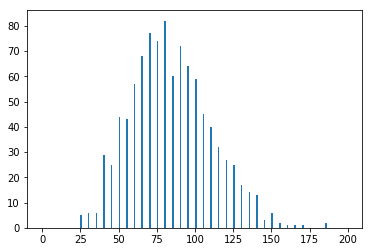

In [7]:
import matplotlib.pyplot as plt
import numpy

fig = plt.figure(0)
n_data,bin_data,patches_data = plt.hist(distances, bins=numpy.arange(0,200,1))

fig.show()


In [42]:
fout = open("coach_and_player_distances.txt","w")

for i in distances:
    fout.write(str(i)+"\n")
    
fout.close()

In [4]:
def CalcChiSquare(h1,h2):
    
    chi2 = 0
    
    #check the nbins
    if len(h1)!=len(h2):
        print("This is nonsense - returning -1")
        chi2 = 0
    else:
        for i in range(len(h1)):
            
            if h1[i]==0 and h2[i]==0:
                this_chi2 = 0
            else:
                this_chi2 = ((h1[i]-h2[i])**2)/(h1[i]+h2[i])
            
            chi2 = chi2 + this_chi2
        
    # give back the calculated value of chi2
    return chi2

In [12]:
def GenDistances(candies, ngen, speed):

    distances = []

    for i in range(ngen):

        d_this_run = 0
        c_this_run = candies

        while c_this_run>0:

            # roll for n candies
            n = random.randint(1,6)
            # roll for time of running
            m = random.randint(1,6)
            # eat the candies
            # note that you may all the candies in which case it is negative
            c_this_run = c_this_run-n
            # run again
            d_this_run = d_this_run + speed*m

        #print("test : ",i," d : ",d_this_run)
        distances.append(d_this_run)
        
    return distances

[90, 85, 55, 115, 65, 105, 95, 70, 65, 80]


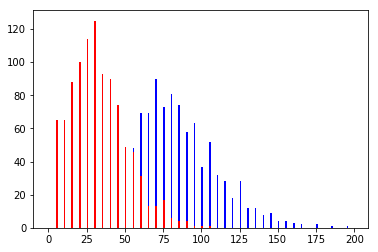

In [14]:
c=5
gen_dist = GenDistances(c, 1000, speed)
print(distances[0:10])
fig=plt.figure(1)
n_data,bin_data,patches_data = plt.hist(distances, bins=numpy.arange(0,200,1),color="b")
n_pred,bins_pred,patches_pred = plt.hist(gen_dist, bins=numpy.arange(0,200,1),color="r")
fig.show()

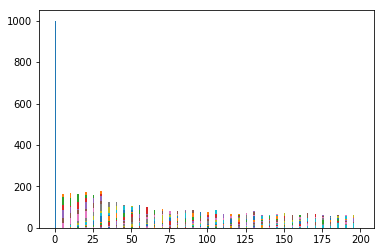

In [22]:
import numpy

test_c_vals=numpy.arange(0,50,1)
test_chi2_vals=[]

for c in test_c_vals:
    
    distances = GenDistances(c, 1000, speed)
    
    #print(distances[0:10])
    
    #fig=plt.figure()
    
    n_pred,bins_pred,patches_pred = plt.hist(distances, bins=numpy.arange(0,200,1))
    
    #fig.show()
    
    
    chi2val = CalcChiSquare(n_pred,n_data)
    
    #print("c,chi2 : ",c,chi2val)
    
    test_chi2_vals.append(chi2val)
    
    #x=input()

50 50


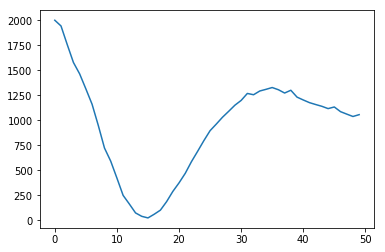

In [23]:
print(len(test_c_vals),len(test_chi2_vals))

fig = plt.figure()
plt.plot(test_c_vals,test_chi2_vals)